# US Commercial flights
## by Abeer Alahmadi

## Investigation Overview

> The overall goal of this presentation is to find insights from the US Commercial flights dataset and find some answer about questions like : 

- When is the best time of day of week/time of year to fly to minimise delays?
- Frequency of flights?
- comparing all four flight delays 
- Avreage delay changing over time

## Dataset Overview

- The Flight data contain ~607K records from the year 2020 taken from the United States Department of Transportation.
- Dataset contains 36 features.
- Some of those contains null values which are self explanatory. Like All the delays including Securtiy, weather or Carrier delays have same number of null values indicating 0 Delay during the particular flight.
- Important categorical features are time, week_day, cancellation_code and reasons_of_delay.

In [19]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

#set plot style
plt.style.use('ggplot')

In [15]:
df = pd.read_csv('flights.csv')

In [22]:
bins = [0, 5, 10, 16, 19, 24]
names = ['Late Night', 'Morning', 'Late Morning', 'Noon', 'Night']

df['time'] = pd.cut(df['DEP_TIME'], bins, labels=names)
delay_15 = df[df.DEP_DELAY>15]

## (Visualization 1)

> When is the best time of day of week/time of year to fly to minimise delays?

- Wednesday has least delay of all days
- Noon time which is between 4-7 PM has lowest delay time. As shown in swarmplot least daypoints are seen.

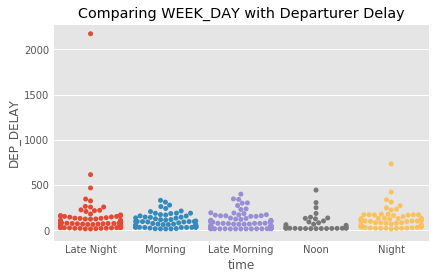

In [27]:
sns.swarmplot(y=delay_15.DEP_DELAY, x=delay_15.time)
plt.title("Comparing WEEK_DAY with Departurer Delay");

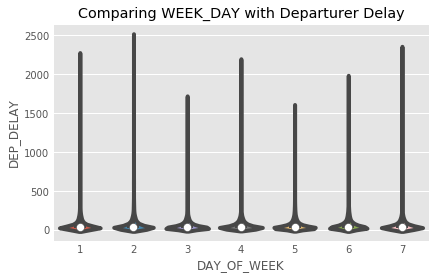

In [26]:
sns.violinplot(y=delay_15.DEP_DELAY, x=delay_15.DAY_OF_WEEK)
plt.title("Comparing WEEK_DAY with Departurer Delay");

## (Visualization 2)

> Figure below shows how average departure delay changes with time. Highest delay is seen during late night and Lowest during Noon.

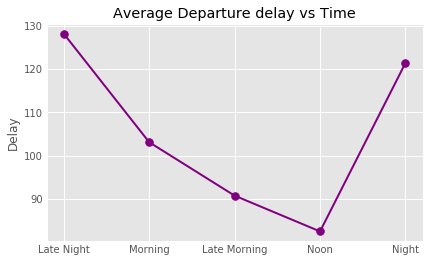

In [28]:
x= delay_15.groupby('time').DEP_DELAY.mean().index
y= delay_15.groupby('time').DEP_DELAY.mean().values

plt.plot(x, y, linewidth=2, marker='.', markersize=15, color='purple')
plt.ylabel('Delay')
plt.title("Average Departure delay vs Time");

## (Visualization 3)

> Days are represented as 1(Monday) to 7(Sunday).
> Highest flight frequency is from Day 5(Friday) and 4(Thursday) which is 35% of overall data.
> Lowest number of flights is from Day 6(Saturday).

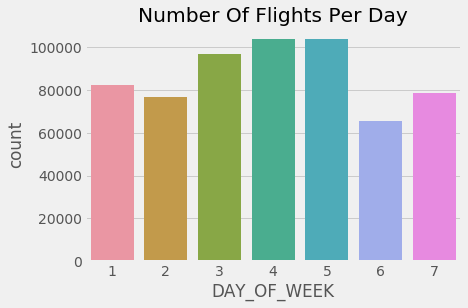

In [18]:
plt.style.use('fivethirtyeight')
sns.countplot(df.DAY_OF_WEEK)
plt.title('Number Of Flights Per Day');

## (Visualization 4)

> How often do flight got cancel? and what's main reason behind cancellation?

- 7K flights got cancelled from 600K records which is only 1.1%
- Mostly due to weather ⛈
- Flights got cancelled due to security reason, curious to know what could be the issue? 🤔

(A = carrier, B = weather, C = NAS, D = security)


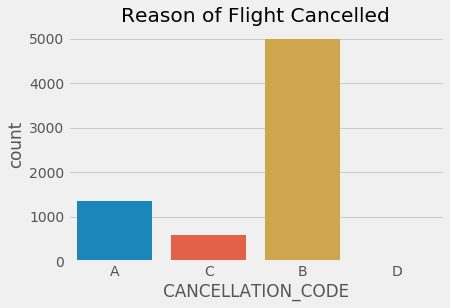

In [11]:
sns.countplot(df.CANCELLATION_CODE)
plt.title("Reason of Flight Cancelled");
print("(A = carrier, B = weather, C = NAS, D = security)")

## (Visualization 5)

> Maximum Flights got cancelled on 5th(friday) and 6th(saturday) day. It's obious that the max number of flights is from friday so max number of flight cancelled can be from that day too.

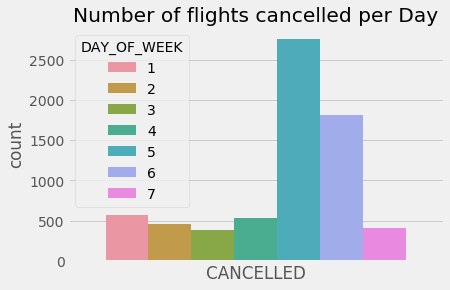

In [12]:
sns.countplot(x="CANCELLED",hue="DAY_OF_WEEK",data=df[df.CANCELLED == 1])
plt.tick_params(bottom=False, labelbottom=False)
plt.title("Number of flights cancelled per Day");

## (Visualization 6)

> Comparing all four reasons of delays in flight

- We can observe similar Pattern in all 4 delays.
- Carrier delays occurs most frequently where as weather delays are rare.
- The straight upline seen at the end of every graph indicates that Higher delays are rare in any category of delays.
- As carrier delay has smooth curve at the end which shows carrier delays have more number of higher delays.

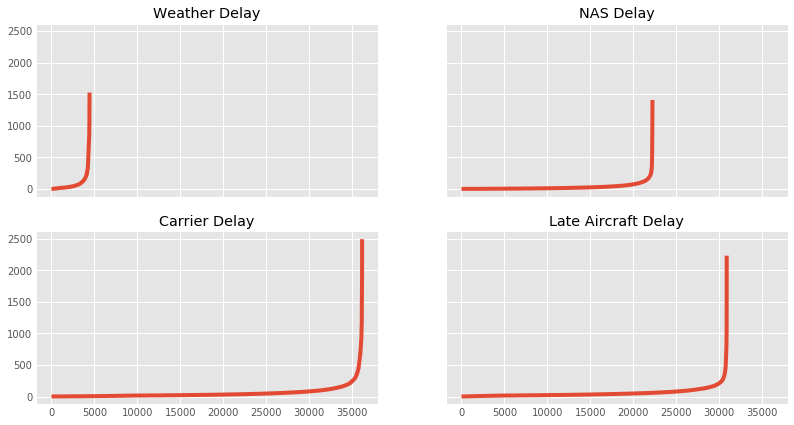

In [29]:
fig, ax = plt.subplots(2,2,sharey=True, sharex=True, figsize=(12,7));
ax[0,0].plot(delay_15[delay_15.WEATHER_DELAY > 0].WEATHER_DELAY.sort_values().reset_index(drop=True))
ax[0,0].set_title("Weather Delay");

ax[0,1].plot(delay_15[delay_15.NAS_DELAY > 0].NAS_DELAY.sort_values().reset_index(drop=True))
ax[0,1].set_title("NAS Delay");

ax[1,0].plot(delay_15[delay_15.CARRIER_DELAY > 0].CARRIER_DELAY.sort_values().reset_index(drop=True))
ax[1,0].set_title("Carrier Delay");

ax[1,1].plot(delay_15[delay_15.LATE_AIRCRAFT_DELAY > 0].LATE_AIRCRAFT_DELAY.sort_values().reset_index(drop=True))
ax[1,1].set_title("Late Aircraft Delay");